<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/Final/Zman42/Solar_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

In [36]:
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch

In [37]:
!pip install opencv-python

# Task 1: Data Exploration and Visualization

## Loading and Cropping the Image

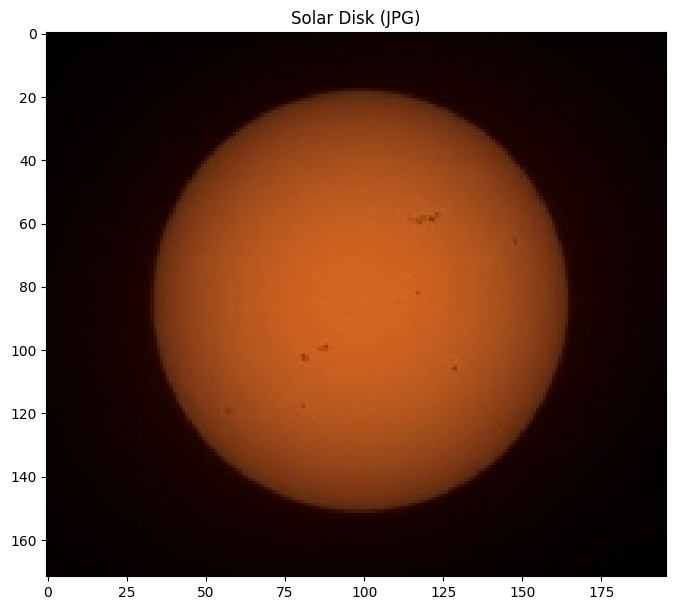

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
import requests
from io import BytesIO
from PIL import Image

# URL to the raw JPG image on GitHub
jpg_url = "https://raw.githubusercontent.com/Zman42/SchoolStuff/main/solar.jpg"

# Fetch the image
response = requests.get(jpg_url)
response.raise_for_status()  # Check for request errors

# Load image using PIL
image = Image.open(BytesIO(response.content))

# Resize the Image
left = 50
top = 180 # Make it 180 pixels shorter
right = image.width - 50
bottom = image.height - 180
modified_image = image.crop((left, top, right, bottom))

# Display the image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(modified_image)
plt.title("Solar Disk (JPG)")
plt.axis('on')
plt.show()

## Visualizing Limb Darkening

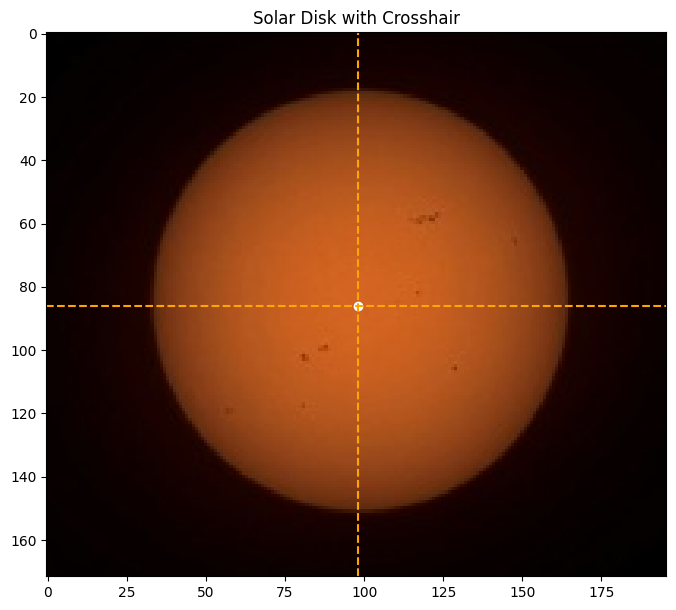

In [39]:
# URL to the raw JPG image on GitHub
jpg_url = "https://raw.githubusercontent.com/Zman42/SchoolStuff/main/solar.jpg"

# Fetch the image
response = requests.get(jpg_url)
response.raise_for_status()

# Load the image using PIL
image = Image.open(BytesIO(response.content))

# Crop the image
left = 50
top = 180
right = image.width - 50
bottom = image.height - 180
modified_image = image.crop((left, top, right, bottom))

# Get dimensions of the cropped image
width, height = modified_image.size
center_x = width // 2
center_y = height // 2

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(modified_image)
plt.title("Solar Disk with Crosshair")
plt.axis('on')

# Plot a red dot at the center
plt.plot(center_x, center_y, 'wo')  # Center Dot

# Crosshairs
plt.axhline(y=center_y, color='orange', linestyle='--')
plt.axvline(x=center_x, color='orange', linestyle='--')

plt.show()

The previous picture with a white dot in the center of the Sun and orange crosshairs to show the color difference between the center of the Sun and the edges.

## Histogram of Pixel Brightness

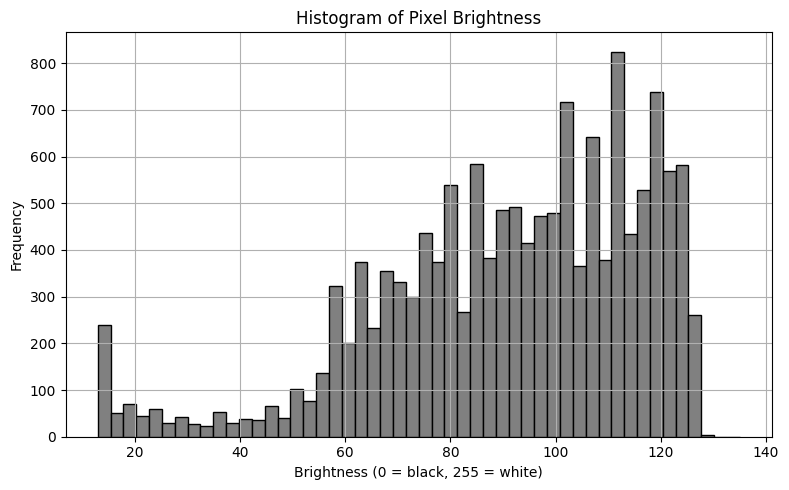

In [40]:
# URL to the raw JPG image on GitHub
jpg_url = "https://raw.githubusercontent.com/Zman42/SchoolStuff/main/solar.jpg"

# Fetch and load image
response = requests.get(jpg_url)
response.raise_for_status()
image = Image.open(BytesIO(response.content))

# Crop the image
left = 50
top = 180
right = image.width - 50
bottom = image.height - 180
cropped_image = image.crop((left, top, right, bottom))

# Convert cropped image to grayscale
gray_image = cropped_image.convert("L")  # 'L' = 8-bit pixels, black and white

# Convert to NumPy array
pixel_values = np.array(gray_image).flatten()  # Flatten to 1D array for histogram

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(pixel_values, bins=50, color='gray', edgecolor='black', range=(13, 135)) # Cutting out the black background
plt.title("Histogram of Pixel Brightness")
plt.xlabel("Brightness (0 = black, 255 = white)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


# Task 2: Physical Context and Research

## What is Solar Limb Darkening

Solar limb darkening is the effect seen in stars where the center of the star is brighter than the edges of the star. Limb darkening occurs due to the opacity of the Sun at certian points combined with the temperature gradient of the star. The opacity of the star is related to the optical depth from the vantage of the viewer. The optical depth decreases with distance from the center of the star due to the lower population of gas molecules and shorter distance from the surface of the star to the opposite side. At the center of the star, the optical depth can be considered infinite.

Another factor contributing to solar limb darkening is the effective temperature of the photosphere and its thickness with relation to the viewer. Closer to the core the photosphere is hotter and its temperature decreases the further away from the core. The cooler parts of the photosphere emit less light (light emission is proportional to $T^4$) while the hotter parts (the parts that the viewer is looking more direectly at) emit more light. So, a darkening effect is created around the edges of the star.

## The Impact of Solar Limb Darkening

The discovery of limb darkening help scientists prove the existance of a solar atmosphere. Due to the temperature gradient of the photosphere, it proved that the Sun was more than just a surface. Limb darkening also gave evidence that other stars would produce a similar effect if photographed. It proved that opacity and temperature could vary in the same way in all stars.

Prehaps the most important impact to come from the discovery of solar limb darkening is the advancement in radiative transfer. Radiative transfer is the transfer of energy via electromagnatic radiation. The radiative transfer equation's solutions have uses in astrophysics, optics, and atmospheric sciences. For example, when the sunlight during sunrsie or sunset passes through the Earth's atmosphere, it must pass through more atmosphere. Understanding the solar limb darkening has impoved understanding in many other areas of physics.

## Sources

- *https://en.wikipedia.org/wiki/Limb_darkening*

- *https://en.wikipedia.org/wiki/Radiative_transfer*

# Task 3: Data Processing and Feature Extraction

## Center and Radius of the Solar Disk

Center: (99, 85), Radius: 66


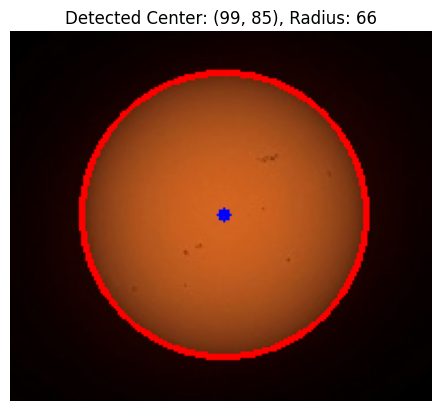

In [41]:
import requests
import numpy as np
import cv2
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Load the image from GitHub
jpg_url = "https://raw.githubusercontent.com/Zman42/SchoolStuff/main/solar.jpg"
response = requests.get(jpg_url)
response.raise_for_status()
image = Image.open(BytesIO(response.content))

# Crop the image as before
left = 50
top = 180
right = image.width - 50
bottom = image.height - 180
cropped_image = image.crop((left, top, right, bottom))

# Convert to grayscale
gray = np.array(cropped_image.convert("L"))

# Use Gaussian blur to smooth noise
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=100, param2=30, minRadius=40, maxRadius=100)

# Draw the detected circle and center
output = np.array(cropped_image)

if circles is not None:
    circles = np.uint16(np.around(circles))
    x, y, r = circles[0][0]  # Use the first detected circle
    print(f"Center: ({x}, {y}), Radius: {r}")

    # Draw the circle and center
    cv2.circle(output, (x, y), r, (255, 0, 0), 2)      # Circle outline (blue)
    cv2.circle(output, (x, y), 3, (0, 0, 255), -1)     # Center dot (red)

    # Show the result
    plt.imshow(output)
    plt.title(f"Detected Center: ({x}, {y}), Radius: {r}")
    plt.axis('off')
    plt.show()

else:
    print("No circles detected.")


## Brightness Profile

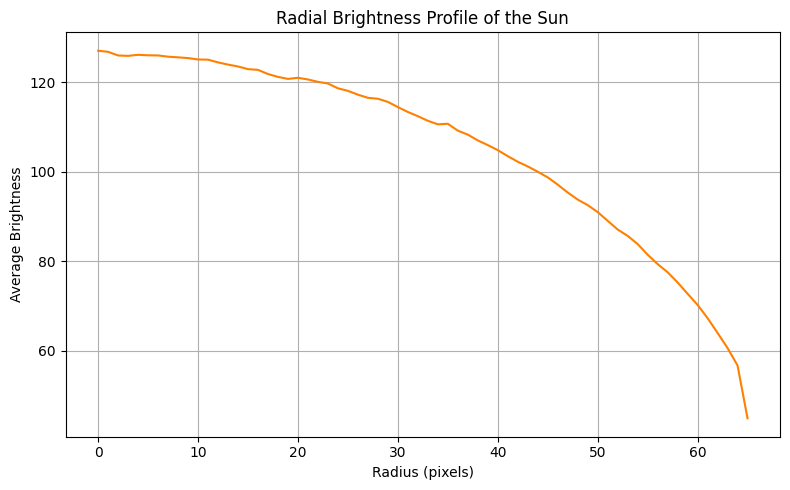

In [42]:
# Load image
jpg_url = "https://raw.githubusercontent.com/Zman42/SchoolStuff/main/solar.jpg"
response = requests.get(jpg_url)
image = Image.open(BytesIO(response.content))

# Crop image
left, top, right, bottom = 50, 180, image.width - 50, image.height - 180
cropped_image = image.crop((left, top, right, bottom))

# Convert to grayscale
gray = np.array(cropped_image.convert("L"))

# Detect circle using Hough Transform
blurred = cv2.GaussianBlur(gray, (9, 9), 2)
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=100, param2=30, minRadius=40, maxRadius=100)

if circles is not None:
    circles = np.uint16(np.around(circles))
    x0, y0, r_max = circles[0][0]
else:
    raise ValueError("Sun circle not detected.")

# Create array of distances from center for each pixel
Y, X = np.indices(gray.shape)
r = np.sqrt((X - x0)**2 + (Y - y0)**2)

# Set up radial bins
r_int = r.astype(int)
radii = np.arange(0, r_max)

# Compute average brightness per radius
radial_mean = np.array([gray[r_int == rad].mean() if np.any(r_int == rad) else 0 for rad in radii])

# Plot the radial brightness profile
plt.figure(figsize=(8, 5))
plt.plot(radii, radial_mean, color='#ff8000')
plt.title("Radial Brightness Profile of the Sun")
plt.xlabel("Radius (pixels)")
plt.ylabel("Average Brightness")
plt.grid(True)
plt.tight_layout()
plt.show()


## Normalized Brightness Profile

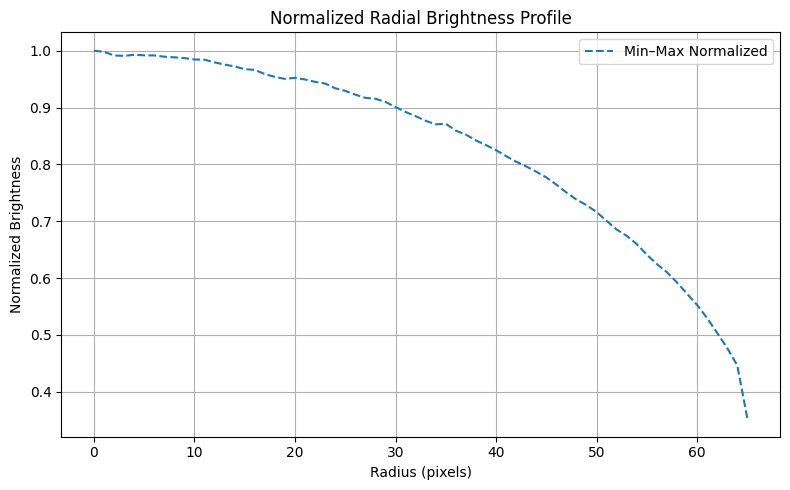

In [43]:
# Peak normalization
# Makes the max brightness 1 and the min brightness 0
radial_normA = radial_mean / np.max(radial_mean)

# Plot normalized profile
plt.figure(figsize=(8, 5))
plt.plot(radii, radial_normA, label='Min–Max Normalized', linestyle='--')
plt.title("Normalized Radial Brightness Profile")
plt.xlabel("Radius (pixels)")
plt.ylabel("Normalized Brightness")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Tabulating Brightness Data

In [44]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame({
    'Radius (pixels)': radii,
    'Brightness': radial_mean,
    'Normalized (min-max)': radial_normA
})

# Display the first few rows
print(df.head(10))

# Save to CSV
# df.to_csv("radial_brightness_profile.csv", index=False)


   Radius (pixels)  Brightness  Normalized (min-max)
0                0  127.000000              1.000000
1                1  126.750000              0.998031
2                2  125.937500              0.991634
3                3  125.850000              0.990945
4                4  126.083333              0.992782
5                5  125.975000              0.991929
6                6  125.944444              0.991689
7                7  125.666667              0.989501
8                8  125.517857              0.988330
9                9  125.357143              0.987064


## Brightness Profile on Solar Cross-Section

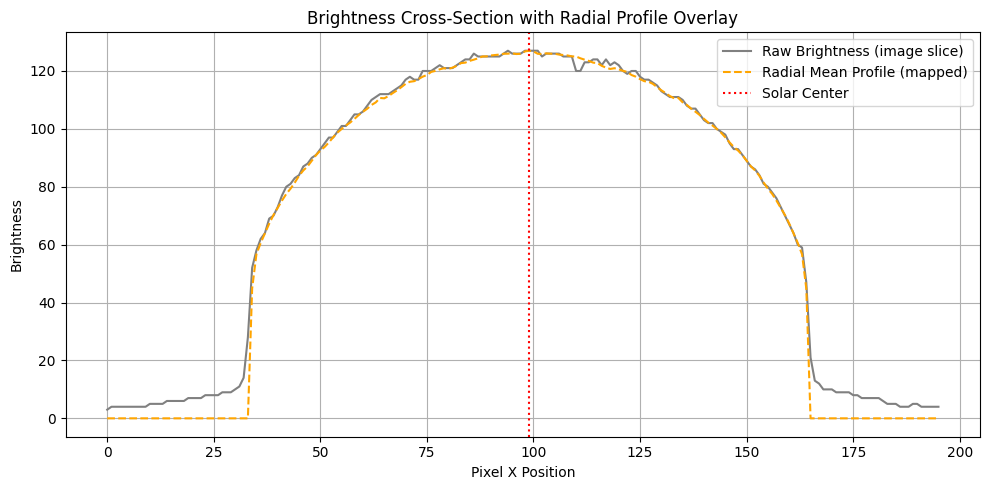

In [45]:
# Extract grayscale
gray = np.array(cropped_image.convert("L"))

# Horizontal cross-section (same row as y0)
horizontal_profile = gray[y0, :]  # Row at vertical center
x_coords = np.arange(len(horizontal_profile))

# Create corresponding radial distances for this slice
radii_horizontal = np.abs(x_coords - x0)

# Match brightness values from radial profile for each x
brightness_from_profile = np.array([radial_mean[r] if r < len(radial_mean) else 0 for r in radii_horizontal])

# Plot both
plt.figure(figsize=(10, 5))
plt.plot(x_coords, horizontal_profile, label='Raw Brightness (image slice)', color='gray')
plt.plot(x_coords, brightness_from_profile, label='Radial Mean Profile (mapped)', color='orange', linestyle='--')
plt.axvline(x=x0, color='red', linestyle=':', label='Solar Center')
plt.title("Brightness Cross-Section with Radial Profile Overlay")
plt.xlabel("Pixel X Position")
plt.ylabel("Brightness")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Task 4: Modeling and Analysis

## Fitting the Brightness Profile

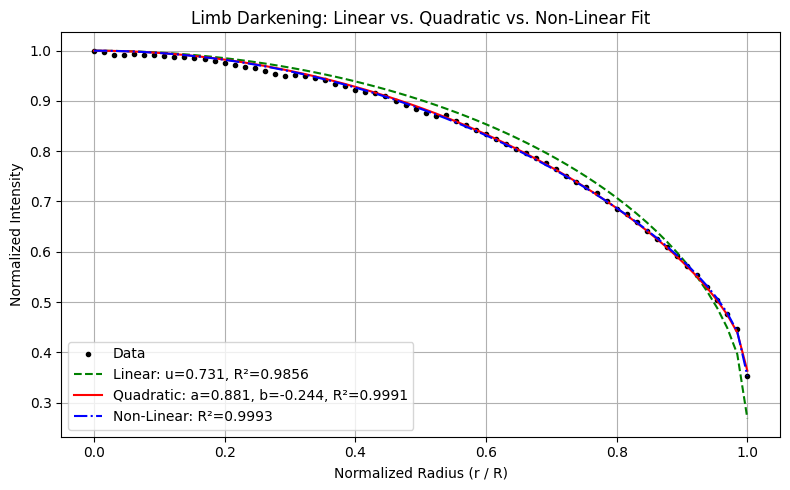

Non-linear Coefficients:
  a1 = -0.0452
  a2 = 0.7876
  a3 = -0.6644
  a4 = 0.5684


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Normalize radius
radii_norm = radii / np.max(radii)
mu = np.sqrt(1 - radii_norm**2)
I_norm = radial_normA  # Already normalized

# Quadratic Model
def quad_limb_darkening(mu, a, b):
    """
    Quadratic limb darkening function.

    Parameters:
        mu (array): Cosine of the angle from the center of the stellar disk (sqrt(1 - r^2)).
        a (float): Linear coefficient of limb darkening.
        b (float): Quadratic coefficient of limb darkening.

    Returns:
        array: Normalized intensity values according to the quadratic limb darkening law.
    """
    return 1 - a * (1 - mu) - b * (1 - mu)**2

params_quad, _ = curve_fit(quad_limb_darkening, mu, I_norm, p0=[0.4412, 0.2312])
a_fit, b_fit = params_quad
I_fit_quad = quad_limb_darkening(mu, a_fit, b_fit)

# R² for quadratic
ss_res_quad = np.sum((I_norm - I_fit_quad)**2)
ss_tot = np.sum((I_norm - np.mean(I_norm))**2)
r_squared_quad = 1 - (ss_res_quad / ss_tot)

# Linear Model
def linear_limb_darkening(mu, u):
    """
    Linear limb darkening function.

    Parameters:
        mu (array): Cosine of the angle from the center of the stellar disk.
        u (float): Linear limb darkening coefficient.

    Returns:
        array: Normalized intensity values according to the linear limb darkening law.
    """
    return 1 - u * (1 - mu)

params_lin, _ = curve_fit(linear_limb_darkening, mu, I_norm, p0=[0.6280])
u_fit = params_lin[0]
I_fit_lin = linear_limb_darkening(mu, u_fit)

# R² for linear
ss_res_lin = np.sum((I_norm - I_fit_lin)**2)
r_squared_lin = 1 - (ss_res_lin / ss_tot)

# Non-Linear Law
def nonlinear_limb_darkening(mu, a1, a2, a3, a4):
    """
    4-parameter non-linear limb darkening function (Claret model).

    Parameters:
        mu (array): Cosine of the angle from the center of the stellar disk.
        a1, a2, a3, a4 (float): Non-linear limb darkening coefficients.

    Returns:
        array: Normalized intensity values according to the non-linear limb darkening law.
    """
    return 1 - a1 * (1 - mu**0.5) - a2 * (1 - mu) - a3 * (1 - mu**1.5) - a4 * (1 - mu**2)

initial_guess = [0.6060, -0.3196, 0.9569, -0.4745]
params_nl, _ = curve_fit(nonlinear_limb_darkening, mu, I_norm, p0=initial_guess)
a1, a2, a3, a4 = params_nl
I_fit_nl = nonlinear_limb_darkening(mu, *params_nl)

# R² for non-linear
ss_res_nl = np.sum((I_norm - I_fit_nl)**2)
r_squared_nl = 1 - (ss_res_nl / ss_tot)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(radii_norm, I_norm, 'ko', markersize=3, label='Data')
plt.plot(radii_norm, I_fit_lin, 'g--', label=f'Linear: u={u_fit:.3f}, R²={r_squared_lin:.4f}')
plt.plot(radii_norm, I_fit_quad, 'r-', label=f'Quadratic: a={a_fit:.3f}, b={b_fit:.3f}, R²={r_squared_quad:.4f}')
plt.plot(radii_norm, I_fit_nl, 'b-.', label=f'Non-Linear: R²={r_squared_nl:.4f}')
plt.xlabel("Normalized Radius (r / R)")
plt.ylabel("Normalized Intensity")
plt.title("Limb Darkening: Linear vs. Quadratic vs. Non-Linear Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print non-linear coefficients
print(f"Non-linear Coefficients:")
print(f"  a1 = {a1:.4f}")
print(f"  a2 = {a2:.4f}")
print(f"  a3 = {a3:.4f}")
print(f"  a4 = {a4:.4f}")

## Comparision to Literature

Compared to literature [1], the parameters for all fits do not match the expected values for the effective temperature ($T_{\text{eff}}$ = 5777 $\pm$ 10K) for the Sun [2].

According to the literature [1], the value for the linear fit would give the Sun an effective temperature of $T_{\text{eff}}$ ~ 4250-4750K.

The quadratic coefficients "a" and "b" are not on the Table 1 provided in Sing's paper.$^1$ However, the found coefficients are not close to the expected coefficients for the Sun's effective temperature.

The non-linear coefficients are also not provided on Table 1 of Sing's paper.$^1$ Again, the found coefficients are not close to the expected coefficients for the Sun's effective temperature.

*$^1$Note: Sing's "Stellar limb-darkening coefficients for CoRot and Kepler" Table 1 has a note where a link is provided to access the full table. However, the link has since been deactivated and I cannot find the full table.*

Sources:

[1]: Sing, D. K. “Stellar Limb-darkening Coefficients for CoRot and Kepler.” Astronomy and Astrophysics, vol. 510, Dec. 2009, p. A21. https://doi.org/10.1051/0004-6361/200913675.

[2]: Smalley, Barry. “Teff and Log G Determinations.” arXiv (Cornell University), Jan. 2005, https://doi.org/10.48550/arxiv.astro-ph/0509535.

## Fit Job on the Observed Data

The model does a good job at fitting the observed data. The best fit is the Non-Linear Law with an R² value of 0.9993. However, the quadratic law is also a good fit with a very similar R² value. From the fits to the data there is not many deviations. It makes sense that the more parameters and coefficients thet are added, the better the fit would be. However, the found data deviates quite a bit from the expected data. This could be because the image's processing or cropping could have distorted the picture or there was an environmental factor (such as clouds) darkening the picture.

## What This Data Can Tell Us

The fit coefficients can tell you about the Sun's atmosphere by giving insight about the temperature gradient and opacity of the photosphere. The larger the coefficients in the Limb Darkening Laws the steeper the temperature drop in the solar atmosphere. Also, the shape of the limb darkening profile reflects how opacity changes with wavelength. For example, stronger limb darkening exists at shorter wavelengths and weaker limb darkening exists at longer wavelengths. And wavelength is also related to the temperature of the star.

If we were able to get pictures of other stars like we are able to of the Sun, we would find different limb darkening profiles to tell us about other solar atmospheres.